In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

sns.set(style='ticks',font='sans-serif',font_scale=2)


In [10]:
data = pd.read_table("220801_AtzR_J364000_multicomponentdata.txt",skiprows=8)
date = "220801"
with open("220801.json") as f:
    well_dict = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '220801_AtzR_J364000_multicomponentdata.txt'

In [ ]:
well_dict = {
  "fluorecein":["B3","B4","B5","B6","B7","B8","B9","B10"],
  "AtzR:S12=3:7":["C3","C4","C5"],
  "AtzR:S12=3:7_neg":["C6","C7","C8"],
  "4:6":["C9","C10","D3"],
  "4:6_neg":["D4","D5","D6"],
  "5:5":["D7","D8","D9"],
  "5:5_neg":["D10","E3","E4"],
  "6:4":["E5","E6","E7"],
  "6:4_neg":["E8","E9","E10"],
  "7:3":["F3","F4","F5"],
  "7:3_neg":["F6","F7","F8"]
}
well_dict

{'fluorecein': ['B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10'],
 'AtzR:S12=3:7': ['C3', 'C4', 'C5'],
 'AtzR:S12=3:7_neg': ['C6', 'C7', 'C8'],
 '4:6': ['C9', 'C10', 'D3'],
 '4:6_neg': ['D4', 'D5', 'D6'],
 '5:5': ['D7', 'D8', 'D9'],
 '5:5_neg': ['D10', 'E3', 'E4'],
 '6:4': ['E5', 'E6', 'E7'],
 '6:4_neg': ['E8', 'E9', 'E10'],
 '7:3': ['F3', 'F4', 'F5'],
 '7:3_neg': ['F6', 'F7', 'F8']}

In [ ]:
data

,Well,Cycle,SYBR,ROX
0,A1,1,NaN,NaN
1,A2,1,NaN,NaN
2,A3,1,NaN,NaN
3,A4,1,NaN,NaN
4,A5,1,NaN,NaN
...,...,...,...,...
23035,H8,240,NaN,NaN
23036,H9,240,NaN,NaN
23037,H10,240,NaN,NaN
23038,H11,240,NaN,NaN


In [ ]:
del well_dict["fluorecein"]

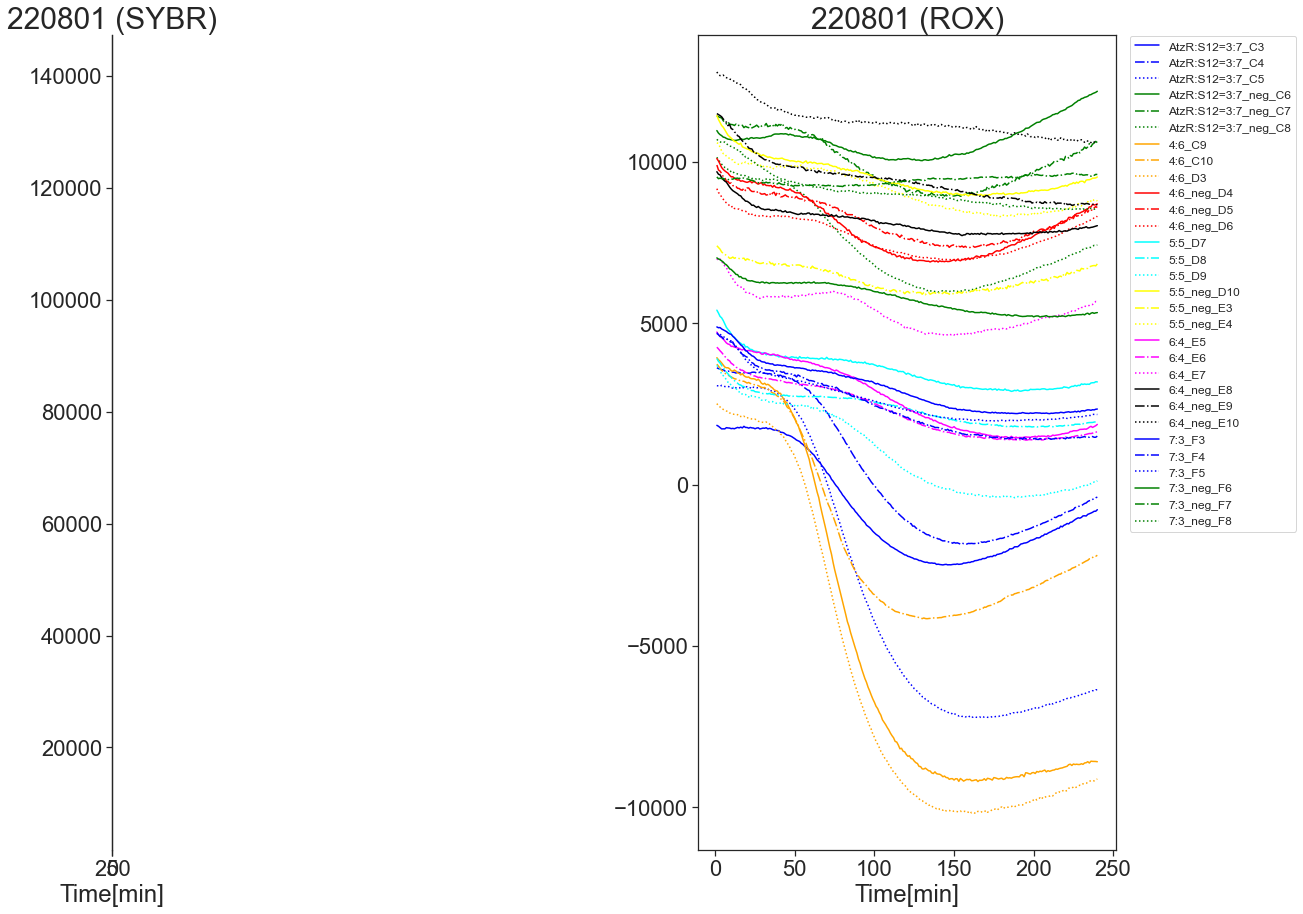

In [ ]:
fig = plt.figure(figsize=(18,15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_title(f'{date} (SYBR)',fontsize='30')
ax1.set_xlabel("Time[min]")

ax2.set_title(f'{date} (ROX)',fontsize='30')
ax2.set_xlabel("Time[min]")

cmap = ['Blue', 'Green', 'Orange', 'Red','Cyan', 'Yellow','Magenta' ,'Black']
linestyle = ['solid','dashdot','dotted']

count=0
for i,key in enumerate(well_dict.keys()):
    for j,well in enumerate(well_dict[key]):
        name=f"{key}_{well}"
        tmp_data = data[data["Well"]==well] 
        times = tmp_data["Cycle"].values
        
        sybr = tmp_data["SYBR"].values
        rox = tmp_data["ROX"].values
        ax1.plot(times,sybr,color=cmap[i%8],label=f'{name}',linestyle=linestyle[j%3])
        ax2.plot(times,rox,color=cmap[i%8],label=f'{name}',linestyle=linestyle[j%3])
        count+=1
        
plt.legend(bbox_to_anchor=(1.03, 1),loc=2,borderaxespad=0.1,fontsize='12')
#plt.savefig(f'{date}_result')

## Error Bar

In [ ]:
DIV=4
time_points=np.linspace(0,len(times),num=DIV+1)
time_points[0]=1

fig =plt.figure(figsize=(8,10))
for i,key in enumerate(well_dict.keys()):
    for j,well in enumerate(well_dict[key]):
        tmp_data = data[data["Well"]==well] 
        times = tmp_data["Cycle"].values

for i,key in enumerate(well_dict.keys()):
    ini_well = well_dict[key][0]
    tmp_data = data[data["Well"]==ini_well] 
    times = tmp_data["Cycle"].values
        
    
    means =[]
    sems = []

    for t in time_points:
        ts = data[data["Cycle"]==t]
        ts.set_index("Well",inplace=True)
        x = ts.loc[well_dict[key]]["SYBR"]
        sems.append(x.sem()) #標準誤差
        means.append(x.mean())
    
    plt.plot(time_points,means,label=f"{key}")
    plt.errorbar(time_points,means,yerr=sems,fmt="ko",ecolor="black",capsize=4)

plt.xlabel("Time[min]")
plt.legend(bbox_to_anchor=(1.03, 1),loc=2,borderaxespad=0.,fontsize='12')
plt.tight_layout()
#plt.savefig(f'{date}_error')

NameError: name 'times' is not defined